### **First draft code**

In [3]:
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas
import seaborn as sns 
from sklearn import preprocessing
import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from collections import Counter 
import matplotlib.cm as cm
from matplotlib import rcParams
from prettytable import PrettyTable
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression
import re , emoji, string

In [4]:
df=pd.read_csv("all_data.csv")

In [5]:
df.head()

,Unnamed: 0,text,sentiment
0,0,﻿حقا\n,pos
1,1,صح جدا\n,pos
2,2,﻿اه و النعمة \n,pos
3,3,كلامك جميل ورائع\n,pos
4,4,﻿و خير الكلام ما قل و دل\n,pos


In [6]:
df.shape

(156407, 3)

In [7]:
df.sample(20)

,Unnamed: 0,text,sentiment
77982,75991,أهمية وزير الطاقة السعودي ووزير الطاقة القطري ...,pos
78831,76840,هلابك بوسمره 💘\n,pos
24907,22916,لبيه ياروح الغلا وانته الشــوق يامن حضورك يجعل...,pos
46104,44113,البفرق انو منو القدر يستحمل وبقدر يكمل 💪 منو ا...,pos
82905,80914,بتعانى من زيادة الوزن والكرش أو الترهلات 😚 منت...,pos
28078,26087,احصلي علي افضل ملابس المحجباب 😍 و تالقي دائما ...,pos
20005,18014,عيب مجتمعنا مايؤمن بالنوابغ 🤓 😎\n,pos
95623,93632,موجود ❤ ️ و الغياب اصلا بقاله اسبوع كل يوم يتق...,neg
31792,29801,﴿ و َ إ ِ ذ ْ ص َ ر َ ف ْ ن َ ا إ ِ ل َ ي ْ ك ...,pos
3925,1934,هذي اسمها سرسره :) والباقي ماباكتبه الا لعن ال...,pos


In [8]:
df[df.isnull().any(axis=1)].head()

,Unnamed: 0,text,sentiment


In [9]:
for x in '#.][!XR':
    df['text'] = df['text'].astype(str).str.replace(x,'')

In [10]:
arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations

def remove_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

In [11]:
def normalize_arabic(text):
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)
    return text

In [12]:
#????
def remove_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

In [13]:

def remove_emoji(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [14]:
def processPost(tweet): 

    #Replace @username with empty string
    tweet = re.sub('@[^\s]+', ' ', tweet)
    
    #Convert www.* or https?://* to " "
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',tweet)
    
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)

    # remove punctuations
    tweet= remove_punctuations(tweet)
    
    # normalize the tweet
     #tweet= normalize_arabic(tweet)
    
    # remove repeated letters
    tweet=remove_repeating_char(tweet)

    # remove emoji
    tweet=remove_emoji(tweet)
    
    return tweet

In [15]:
df["text"] = df['text'].apply(lambda x: processPost(x)) # apply used to call the method processpost

In [16]:
df.sample(20)

,Unnamed: 0,text,sentiment
26024,24033,يا صباح الجمال ماشاء اله\n,pos
10085,8094,إعلم أن حاجتك إلى الصدقة أشد من حاجة من تصدق ع...,pos
83914,81923,البديل الفعال لفياغرا منتج امريكي طبيعي لحي...,pos
19765,17774,حدث الان وانا ف العربية تحدث معى بأدب واخفض صو...,pos
116538,114547,دورينا من جرف ل دحديره ماراح نتطور و المناصب ك...,neg
17076,15085,لا تفوتوا الفرصة تابعونا على صفحتنا و جاوبوا ...,pos
94123,92132,فديتك \n,pos
18203,16212,من ضمن المشاركين في الشاعر وفنان الكاريكاتير ا...,pos
75774,73783,ده بالنهار بس \n,pos
8673,6682,هل تعاني من الضعف الجنسي الآن الحل مالتي ماكا...,pos


In [17]:
tokenizer = RegexpTokenizer(r'\w+')
df["text"] = df["text"].apply(tokenizer.tokenize)

In [42]:
df.sample(20)

,Unnamed: 0,text,sentiment
79858,77867,"[يخرب, بيتك, ما, اغلظك, اي, رحمها, شوي, لهل, ا...",pos
122849,120858,"[ليته, انا, الحب, حقه]",neg
48581,46590,"[واضح, من, الهجة, والسب]",pos
55721,53730,"[عجلة, طاقة, النجاح, والغنى, سريعة, تحب, السرع...",pos
129724,127733,"[بجرب, هالماركة, و, اشوف, اخرتها, من, أظافري]",neg
138704,136713,"[واله, قلناها, حيختارولو, بتروجيت, عشان, غياب,...",neg
136655,134664,"[ساعدوني, اطلع, عياره, لبنت, اخوي]",neg
153747,151756,"[تحدي, خسارة, الوزن, مع, المنتج, الأقوى, عالمي...",neg
126289,124298,"[ليش, تلعبين]",neg
139537,137546,"[ريتويت, لمتواجدين, الآن, زيادة, متابعين, بسرع...",neg


In [18]:

nltk.download('stopwords')
stopwords_list = stopwords.words('arabic')


[nltk_data] Downloading package stopwords to C:\Users\abullah-
[nltk_data]     pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
stopwords_list[1:5]

['إذا', 'إذما', 'إذن', 'أف']

In [20]:
print(len(stopwords_list))
print(type(stopwords_list))

754
<class 'list'>


In [21]:
Strted_stopwords_list = ' '.join([str(elem) for elem in stopwords_list]) 
Strted_stopwords_list

'إذ إذا إذما إذن أف أقل أكثر ألا إلا التي الذي الذين اللاتي اللائي اللتان اللتيا اللتين اللذان اللذين اللواتي إلى إليك إليكم إليكما إليكن أم أما أما إما أن إن إنا أنا أنت أنتم أنتما أنتن إنما إنه أنى أنى آه آها أو أولاء أولئك أوه آي أي أيها إي أين أين أينما إيه بخ بس بعد بعض بك بكم بكم بكما بكن بل بلى بما بماذا بمن بنا به بها بهم بهما بهن بي بين بيد تلك تلكم تلكما ته تي تين تينك ثم ثمة حاشا حبذا حتى حيث حيثما حين خلا دون ذا ذات ذاك ذان ذانك ذلك ذلكم ذلكما ذلكن ذه ذو ذوا ذواتا ذواتي ذي ذين ذينك ريث سوف سوى شتان عدا عسى عل على عليك عليه عما عن عند غير فإذا فإن فلا فمن في فيم فيما فيه فيها قد كأن كأنما كأي كأين كذا كذلك كل كلا كلاهما كلتا كلما كليكما كليهما كم كم كما كي كيت كيف كيفما لا لاسيما لدى لست لستم لستما لستن لسن لسنا لعل لك لكم لكما لكن لكنما لكي لكيلا لم لما لن لنا له لها لهم لهما لهن لو لولا لوما لي لئن ليت ليس ليسا ليست ليستا ليسوا ما ماذا متى مذ مع مما ممن من منه منها منذ مه مهما نحن نحو نعم ها هاتان هاته هاتي هاتين هاك هاهنا هذا هذان هذه هذي هذين هكذا هل هلا هم هما هن هنا هن

In [22]:
df["text"]=df["text"].apply(lambda x: [item for item in x if item not in stopwords_list])

In [48]:
all_words = [word for tokens in df["text"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in df["text"]]

VOCAB = sorted(list(set(all_words)))

print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

1420233 words total, with a vocabulary size of 130981
Max sentence length is 123


In [49]:
counter = Counter(all_words)
#??????
counter.most_common(10)

[('اله', 14799),
 ('الي', 10755),
 ('انا', 6848),
 ('كيلو', 5184),
 ('واله', 5052),
 ('ان', 4822),
 ('50', 4625),
 ('رتويت', 3822),
 ('اليوم', 3731),
 ('يوم', 3610)]

In [50]:
counted_freq = Counter(all_words)

words = []
freq = []
for letter, count in counted_freq.most_common(10):
    words.append(letter)
    freq.append(count)

<BarContainer object of 10 artists>

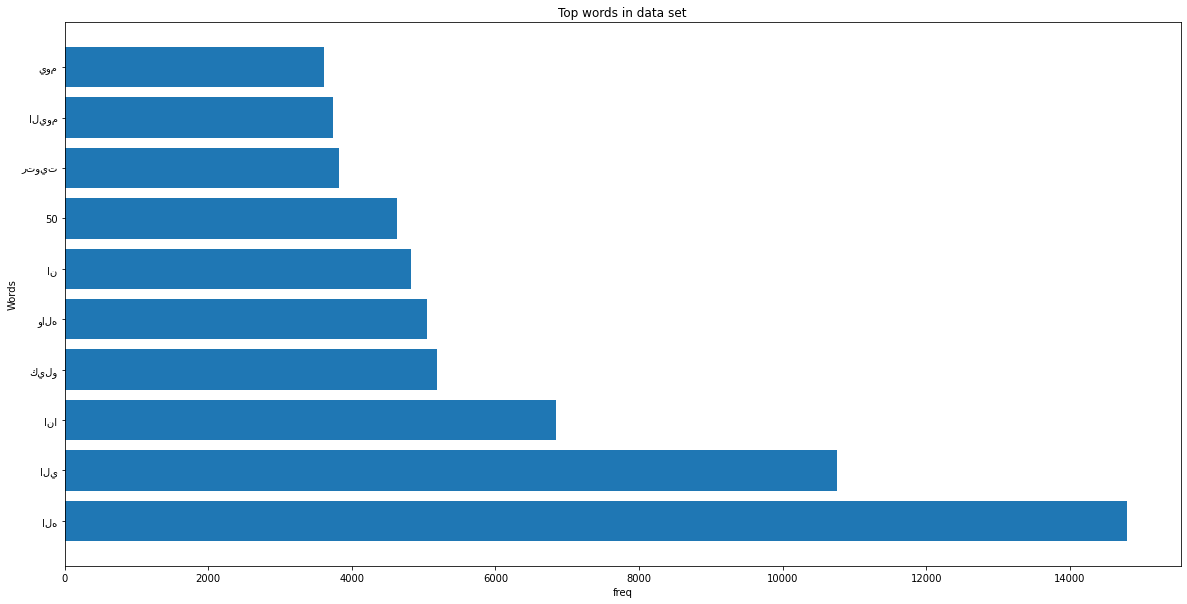

In [51]:
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in data set')
plt.xlabel('freq')
plt.ylabel('Words')
plt.barh(words, freq)

In [52]:
mask = (df.sentiment =='pos')
print("the number of positive tweets is :",df[mask].sentiment.count())
mask = (df.sentiment =='neg')
print("the number of negaitive tweets is :",df[mask].sentiment.count())

the number of positive tweets is : 93144
the number of negaitive tweets is : 63263


In [23]:

word_vectorizer = TfidfVectorizer(sublinear_tf=True,strip_accents='unicode',analyzer='word',ngram_range=(1, 1),max_features =10000)

unigramdataGet= word_vectorizer.fit_transform(df['text'].astype('str'))
unigramdataGet = unigramdataGet.toarray()

vocab = word_vectorizer.get_feature_names()
unigramdata_features=pd.DataFrame(np.round(unigramdataGet, 1), columns=vocab)
unigramdata_features[unigramdata_features>0] = 1

unigramdata_features.head()

,10,12,13,15,18,20,2018,204,250,30,...,ڪان,ڪل,گا,گل,گنت,ۆفاء,ۆم,ۆن,ۈاله,یومكم
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
pro= preprocessing.LabelEncoder()
encpro=pro.fit_transform(df['sentiment'])
df['sentiment'] = encpro

In [25]:
df.sample(10)

,Unnamed: 0,text,sentiment
138781,136790,"[جمعتك, طيبه, حاجه]",0
30710,28719,"[نوش, جان]",1
135189,133198,"[بصفقك, وامسح, الصوره, جهازك]",0
62738,60747,"[ٲسمگ, شاشة, الهاتف, يخلق, بداخلي, السعادة, فڪ...",1
149883,147892,"[هوس, الارميز, ربي, رايحين, لمقالة, مخرج, فيلم...",0
133007,131016,"[ياخي, اذا, مب, عاجبكم, ليوناردو, طيروه, الشتو...",0
95954,93963,"[جتني, مخالفة, قطع, اشارة, وانا, وقتها, شفت, ا...",0
489,489,"[اله, يحرم, حدا, العائلة, الدافية, والذرية, ال...",1
5467,3476,"[شكرا, ليدر, مجود]",1
117296,115305,"[تلعبي, ورايا]",0


In [26]:
y=df['sentiment']
X=unigramdata_features

In [27]:
#??????
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [58]:
nb=GaussianNB()
nb= nb.fit(X_train , y_train)
nb

GaussianNB()

In [59]:
y_pred = nb.predict(X_test)
nb_1=nb.score(X_test, y_test)
print('Accuracy= {:.3f}'.format(nb.score(X_test, y_test)),'%')
print('Precision',round(f1_score(y_test, y_pred),2),'%')
print('Recall',round(recall_score(y_test, y_pred),2),'%')
rf_f1=round(f1_score(y_test, y_pred),2)
print('F1',round(f1_score(y_test, y_pred),2),'%')


Accuracy= 0.603 %
Precision 0.55 %
Recall 0.41 %
F1 0.55 %


In [28]:
RC= RidgeClassifier()
RC= RC.fit(X_train , y_train)
RC

RidgeClassifier()

In [29]:
y_pred = RC.predict(X_test)
rc_1=RC.score(X_test, y_test)
print('Accuracy= {:.3f}'.format(RC.score(X_test, y_test)),'%')
print('Precision',round(f1_score(y_test, y_pred),2),'%')
print('Recall',round(recall_score(y_test, y_pred),2),'%')
rf_f1=round(f1_score(y_test, y_pred),2)
print('F1',round(f1_score(y_test, y_pred),2),'%')

Accuracy= 0.725 %
Precision 0.79 %
Recall 0.85 %
F1 0.79 %


In [62]:
LR= LogisticRegression(penalty = 'l2', C = 1)
LR= LR.fit(X_train , y_train)
LR

LogisticRegression(C=1)

In [63]:
y_pred = LR.predict(X_test)
lr_1=LR.score(X_test, y_test)
print('Accuracy= {:.3f}'.format(LR.score(X_test, y_test)),'%')
print('Precision',round(f1_score(y_test, y_pred),2),'%')
print('Recall',round(recall_score(y_test, y_pred),2),'%')
rf_f1=round(f1_score(y_test, y_pred),2)
print('F1',round(f1_score(y_test, y_pred),2),'%')

Accuracy= 0.727 %
Precision 0.79 %
Recall 0.86 %
F1 0.79 %


In [64]:
x = PrettyTable()
print('\n')
print("Comparison of all algorithms on F1 score")
x.field_names = ["Model", "Accuracy"]


x.add_row(["Naive Bayes Algorithm", round(nb_1,2)])
x.add_row(["Ridge Classifier Algorithm",  round(rc_1,2)])
x.add_row(["Logistic Regression Algorithm", round(lr_1,2)])

print(x)
print('\n')



Comparison of all algorithms on F1 score
+-------------------------------+----------+
|             Model             | Accuracy |
+-------------------------------+----------+
|     Naive Bayes Algorithm     |   0.6    |
|   Ridge Classifier Algorithm  |   0.73   |
| Logistic Regression Algorithm |   0.73   |
+-------------------------------+----------+




In [30]:
RC =LogisticRegression(penalty = 'l2', C = 1)
RC.fit(X,y)

LogisticRegression(C=1)

In [46]:
tv=['عبدالله رجال طيب']
tv2=['ابي اقتل  ']

In [43]:
pred=RC.predict(word_vectorizer.transform(tv))
pred=pro.inverse_transform(pred)
prediction=pd.DataFrame(pred, columns=['Prediction']) 
print (tv,prediction)

['عبدالله رجال طيب']   Prediction
0        pos


In [47]:
pred=RC.predict(word_vectorizer.transform(tv2))
pred=pro.inverse_transform(pred)
prediction=pd.DataFrame(pred, columns=['Prediction']) 
print (tv2,prediction)

['ابي اقتل  ']   Prediction
0        neg


In [49]:
#طريقة الريبورت
print(classification_report(y_test, y_pred))

NameError: name 'classification_report' is not defined